In [1]:
import glob
import os
from datetime import datetime, timedelta
import pandas as pd
from functools import reduce

%config IPCompleter.greedy=True


fp = os.getcwd() + '/../../data/trends/*.csv'

files = glob.glob(fp)
latest_file = max(files, key=os.path.getctime)

In [2]:
files

['/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0426_2019_2333_usa-bos.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0427_2019_1158_usa-hou.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0426_2019_2333_usa-phi.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0427_2019_1858_usa-wdc.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0427_2019_1856_usa-atl.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0427_2019_1544_usa-hou.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0426_2019_2152_usa-det.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0428_2019_1748_usa-hou.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data

In [3]:
latest_file

'/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0428_2019_1759_usa-det.csv'

In [4]:
latest_date_obj = datetime.strptime('_'.join(latest_file.split('_')[2:5]), '%m%d_%Y_%H%M')
latest_date_obj

datetime.datetime(2019, 4, 28, 17, 59)

In [5]:
time_location = '_'.join(latest_file.split('_')[2:6]).replace('.csv', '')
#.replace('.csv', '')
time_location

'0428_2019_1759_usa-det'

In [6]:
less_than_day_old = [file for file in files if (latest_date_obj - datetime.strptime('_'.join(file.split('_')[2:5]), '%m%d_%Y_%H%M')).days < 1]
less_than_day_old

['/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0427_2019_1858_usa-wdc.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0427_2019_1856_usa-atl.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0428_2019_1748_usa-hou.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0427_2019_1955_usa-chi.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0427_2019_1858_usa-sfo.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0427_2019_2015_usa-phi.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0427_2019_2015_usa-bos.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data/trends/trends_0427_2019_1917_usa-chi.csv',
 '/Users/Mitch/PycharmProjects/viral_tees/src/notebooks/mitch/../../data

In [7]:
df_list = [pd.read_csv(file, index_col=0).rename(columns={'tweet_volume': 'tweet_volume_{}'.format('_'.join(file.split('_')[2:6]).replace('.csv', '')),
                                                         'promoted_content': 'promoted_content_{}'.format('_'.join(file.split('_')[2:6]).replace('.csv', ''))}) for file in less_than_day_old] 

In [8]:
# df = reduce(lambda df1,df2: pd.merge(df1,df2,on='name'), df_list)

In [9]:
df_merged = reduce(lambda  left,right: pd.merge(left, right, on=['name', 'query', 'url'], how='outer'), df_list)

In [10]:
df_merged

,name,promoted_content_0427_2019_1858_usa-wdc,query,tweet_volume_0427_2019_1858_usa-wdc,url,promoted_content_0427_2019_1856_usa-atl,tweet_volume_0427_2019_1856_usa-atl,promoted_content_0428_2019_1748_usa-hou,tweet_volume_0428_2019_1748_usa-hou,promoted_content_0427_2019_1955_usa-chi,...,promoted_content_0427_2019_1856_usa-sea,tweet_volume_0427_2019_1856_usa-sea,promoted_content_0428_2019_0333_usa-lax,tweet_volume_0428_2019_0333_usa-lax,promoted_content_0428_2019_1748_usa-bos,tweet_volume_0428_2019_1748_usa-bos,promoted_content_0428_2019_1748_usa-phi,tweet_volume_0428_2019_1748_usa-phi,promoted_content_0427_2019_1917_usa-dal,tweet_volume_0427_2019_1917_usa-dal
0,Endgame,NaN,Endgame,1266355.0,http://twitter.com/search?q=Endgame,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1221525.0
1,#ThankYouAvengers,NaN,%23ThankYouAvengers,285283.0,http://twitter.com/search?q=%23ThankYouAvengers,NaN,283430.0,NaN,NaN,NaN,...,NaN,283430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290661.0
2,Thanos,NaN,Thanos,254525.0,http://twitter.com/search?q=Thanos,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Poway,NaN,Poway,103640.0,http://twitter.com/search?q=Poway,NaN,99137.0,NaN,NaN,NaN,...,NaN,99137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116131.0
4,#AvengersEndame,NaN,%23AvengersEndame,65222.0,http://twitter.com/search?q=%23AvengersEndame,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62187.0
5,Chabad,NaN,Chabad,41907.0,http://twitter.com/search?q=Chabad,NaN,40616.0,NaN,NaN,NaN,...,NaN,40616.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46037.0
6,Daniel Jones,NaN,%22Daniel+Jones%22,18982.0,http://twitter.com/search?q=%22Daniel+Jones%22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,#HTTR,NaN,%23HTTR,18562.0,http://twitter.com/search?q=%23HTTR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,#OrganizeWithBernie,NaN,%23OrganizeWithBernie,17593.0,http://twitter.com/search?q=%23OrganizeWithBernie,NaN,17464.0,NaN,NaN,NaN,...,NaN,17464.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18019.0
9,#IndependentBookstoreDay,NaN,%23IndependentBookstoreDay,12229.0,http://twitter.com/search?q=%23IndependentBook...,NaN,12136.0,NaN,NaN,NaN,...,NaN,12136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
latest_file.split('_')[5].replace('.csv', '')

'usa-det'

# Getting some basic trends statistics, graphing the data 

In [12]:
tweet_volume_df = df_merged.filter(regex=r'(name|tweet_volume.*)',axis=1)
tweet_volume_df = tweet_volume_df.copy(deep=True)
tweet_volume_df['sum'] = tweet_volume_df.sum(numeric_only=True, axis=1)
tweet_volume_df['average'] = tweet_volume_df.mean(numeric_only=True, axis=1)
tweet_volume_df = tweet_volume_df.sort_values(by=['sum', 'average'], ascending=False).reset_index(drop=True)

In [13]:
tweet_volume_df

,name,tweet_volume_0427_2019_1858_usa-wdc,tweet_volume_0427_2019_1856_usa-atl,tweet_volume_0428_2019_1748_usa-hou,tweet_volume_0427_2019_1955_usa-chi,tweet_volume_0427_2019_1858_usa-sfo,tweet_volume_0427_2019_2015_usa-phi,tweet_volume_0427_2019_2015_usa-bos,tweet_volume_0427_2019_1917_usa-chi,tweet_volume_0427_2019_1955_usa-mia,...,tweet_volume_0427_2019_2015_usa-hou,tweet_volume_0427_2019_1955_usa-dal,tweet_volume_0427_2019_1858_usa-det,tweet_volume_0427_2019_1856_usa-sea,tweet_volume_0428_2019_0333_usa-lax,tweet_volume_0428_2019_1748_usa-bos,tweet_volume_0428_2019_1748_usa-phi,tweet_volume_0427_2019_1917_usa-dal,sum,average
0,Endgame,1266355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1257525.0,...,NaN,1257525.0,NaN,NaN,NaN,NaN,NaN,1221525.0,62651730.0,2.456931e+06
1,#ThankYouAvengers,285283.0,283430.0,NaN,306824.0,283430.0,313411.0,308465.0,290661.0,306824.0,...,313411.0,306824.0,285283.0,283430.0,NaN,NaN,NaN,290661.0,35560324.0,6.184404e+05
2,#AvengersEndgame,NaN,797380.0,NaN,785195.0,797380.0,NaN,752707.0,767611.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33005790.0,1.500263e+06
3,Poway,103640.0,99137.0,NaN,145436.0,99137.0,161524.0,152630.0,116131.0,145436.0,...,161524.0,145436.0,103640.0,99137.0,NaN,NaN,NaN,116131.0,12478590.0,2.495718e+05
4,#NFLDraft,NaN,275164.0,NaN,266066.0,275164.0,NaN,239528.0,260667.0,266066.0,...,NaN,NaN,276038.0,275164.0,NaN,NaN,NaN,NaN,12080529.0,5.033554e+05
5,PSOE,NaN,NaN,294390.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,294390.0,294390.0,NaN,8404044.0,5.795892e+05
6,#Endgame,NaN,183674.0,NaN,180702.0,183674.0,NaN,173089.0,176482.0,NaN,...,NaN,NaN,184162.0,NaN,NaN,NaN,NaN,NaN,8309124.0,3.462135e+05
7,Chabad,41907.0,40616.0,NaN,56322.0,40616.0,62729.0,59121.0,46037.0,56322.0,...,62729.0,56322.0,41907.0,40616.0,NaN,NaN,NaN,46037.0,4804749.0,9.706564e+04
8,America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,676155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4618793.0,1.154698e+06
9,Celtics,NaN,NaN,119305.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,119305.0,NaN,2875783.0,2.300626e+05


In [14]:
# tweet_volume_df_2.to_json('by_name.json')

In [15]:
# import json
# from pprint import pprint

# # tweet_volume_json_data = json.loads('by_name.json')[0]

# os.path.exists('by_name.json')

# with open('by_name.json') as f:
#     tweet_volume_json_data = json.load(f)


In [16]:
# tweet_volume_json_data

In [17]:
tweet_volume_dc_df = tweet_volume_df.filter(regex=r'(name|wdc)',axis=1)
tweet_volume_dc_df = tweet_volume_dc_df.copy(deep=True)
tweet_volume_dc_df['sum'] = tweet_volume_dc_df.sum(numeric_only=True, axis=1)
tweet_volume_dc_df['average'] = tweet_volume_dc_df.mean(numeric_only=True, axis=1)
tweet_volume_dc_df = tweet_volume_dc_df.sort_values(by=['average'], ascending=False).reset_index(drop=True)
tweet_volume_dc_df = tweet_volume_dc_df[tweet_volume_dc_df['average'] != 0]
tweet_volume_dc_df = tweet_volume_dc_df.set_index('name', drop=True)

In [18]:
tweet_volume_dc_df

,tweet_volume_0427_2019_1858_usa-wdc,tweet_volume_0427_2019_1904_usa-wdc,tweet_volume_0427_2019_1953_usa-wdc,tweet_volume_0428_2019_1748_usa-wdc,tweet_volume_0427_2019_1955_usa-wdc,tweet_volume_0427_2019_1917_usa-wdc,tweet_volume_0428_2019_0333_usa-wdc,tweet_volume_0427_2019_2015_usa-wdc,tweet_volume_0428_2019_1759_usa-wdc,tweet_volume_0427_2019_1856_usa-wdc,sum,average
name,,,,,,,,,,,,
Endgame,1266355.0,1212496.0,1257525.0,1293225.0,1257525.0,NaN,1237546.0,NaN,1302290.0,1261900.0,10088862.0,2.241969e+06
Team,NaN,NaN,NaN,914025.0,NaN,NaN,NaN,NaN,920268.0,NaN,1834293.0,1.222862e+06
#ThankYouAvengers,285283.0,286829.0,306824.0,381089.0,306824.0,290661.0,NaN,308465.0,382066.0,283430.0,2831471.0,5.662942e+05
Thor,NaN,NaN,NaN,412803.0,NaN,NaN,NaN,NaN,415907.0,NaN,828710.0,5.524733e+05
Thanos,254525.0,240336.0,249883.0,NaN,249883.0,242182.0,240299.0,NaN,NaN,253664.0,1730772.0,4.326930e+05
PSOE,NaN,NaN,NaN,294390.0,NaN,NaN,NaN,NaN,305526.0,NaN,599916.0,3.999440e+05
#Endgame,NaN,NaN,NaN,NaN,NaN,176482.0,NaN,173089.0,NaN,NaN,349571.0,2.330473e+05
Poway,103640.0,107912.0,145436.0,NaN,145436.0,116131.0,NaN,152630.0,NaN,99137.0,870322.0,2.175805e+05
Celtics,NaN,NaN,NaN,119305.0,NaN,NaN,NaN,NaN,120305.0,NaN,239610.0,1.597400e+05


In [19]:
dc_volume_dict = tweet_volume_dc_df.to_dict(orient='index')


In [20]:
# import json
# with open('by_name.json', 'w') as f:
#     json.dump(dc_volume_dict, f)

In [21]:
tweet_volume_nyc_df = tweet_volume_df.filter(regex=r'(name|nyc)',axis=1)
tweet_volume_nyc_df = tweet_volume_nyc_df.copy(deep=True)
tweet_volume_nyc_df['sum'] = tweet_volume_nyc_df.sum(numeric_only=True, axis=1)
tweet_volume_nyc_df['average'] = tweet_volume_nyc_df.mean(numeric_only=True, axis=1)
tweet_volume_nyc_df = tweet_volume_nyc_df.sort_values(by=['average'], ascending=False).reset_index(drop=True)
tweet_volume_nyc_df = tweet_volume_nyc_df[tweet_volume_nyc_df['average'] != 0]
tweet_volume_nyc_df = tweet_volume_nyc_df.set_index('name', drop=True)
tweet_volume_nyc_df = tweet_volume_nyc_df.drop(['sum','average'], axis=1).fillna('0')

In [22]:
tweet_volume_nyc_df

,tweet_volume_0427_2019_2015_usa-nyc,tweet_volume_0428_2019_0333_usa-nyc,tweet_volume_0428_2019_1759_usa-nyc,tweet_volume_0427_2019_1856_usa-nyc,tweet_volume_0427_2019_1858_usa-nyc,tweet_volume_0427_2019_1953_usa-nyc,tweet_volume_0427_2019_1904_usa-nyc,tweet_volume_0428_2019_1748_usa-nyc,tweet_volume_0427_2019_1917_usa-nyc,tweet_volume_0427_2019_1955_usa-nyc,sum,average
name,,,,,,,,,,,,
#AvengersEndgame,752707.0,700454.0,721585.0,797380.0,799554.0,783048.0,763323.0,716938.0,767611.0,785195.0,7587795.0,1.379599e+06
#ThankYouAvengers,308465.0,432481.0,382066.0,283430.0,285283.0,304779.0,286829.0,381089.0,290661.0,306824.0,3261907.0,5.930740e+05
PSOE,NaN,NaN,305526.0,NaN,NaN,NaN,NaN,294390.0,NaN,NaN,599916.0,3.999440e+05
#Endgame,173089.0,164006.0,NaN,183674.0,184162.0,180235.0,175396.0,NaN,176482.0,180702.0,1417746.0,3.150547e+05
Poway,152630.0,NaN,NaN,99137.0,103640.0,141880.0,107912.0,NaN,116131.0,145436.0,866766.0,2.166915e+05
Giants,92686.0,NaN,NaN,97136.0,97600.0,96339.0,92931.0,NaN,93775.0,96667.0,667134.0,1.667835e+05
Celtics,NaN,NaN,120305.0,NaN,NaN,NaN,NaN,119305.0,NaN,NaN,239610.0,1.597400e+05
Jones,NaN,NaN,NaN,95148.0,95518.0,NaN,90779.0,NaN,NaN,NaN,281445.0,1.407225e+05
De Gea,NaN,NaN,104931.0,NaN,NaN,NaN,NaN,104420.0,NaN,NaN,209351.0,1.395673e+05


In [66]:

tweet_volume_nyc_df.to_csv('nyc_trends.csv')

In [64]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 6})

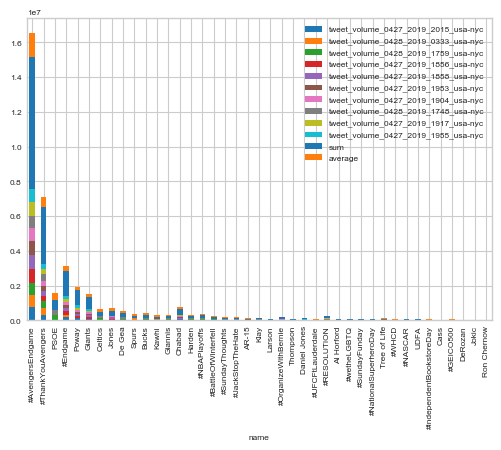

In [62]:
ax = tweet_volume_nyc_df.plot(kind="bar", stacked=True)
